In [ ]:
# Mengimpor pustaka yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

Memuat Dataset

In [ ]:
# Membaca dataset dari file CSV
data = pd.read_csv('weatherHistory.csv', delimiter=';')

# Menampilkan 5 baris pertama dari dataset
data.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,01/04/2006 00:00,Partly Cloudy,rain,"9,47222E+15","7,38889E+16",89,141197,2510,"1,58263E+16",0,101513,Partly cloudy throughout the day.
1,01/04/2006 01:00,Partly Cloudy,rain,"9,35556E+15","7,22778E+15",86,142646,2590,"1,58263E+16",0,101563,Partly cloudy throughout the day.
2,01/04/2006 02:00,Mostly Cloudy,rain,"9,37778E+15","9,37778E+15",89,"3,9284E+16",2040,149569,0,101594,Partly cloudy throughout the day.
3,01/04/2006 03:00,Partly Cloudy,rain,"8,28889E+14","5,94444E+15",83,141036,2690,"1,58263E+16",0,101641,Partly cloudy throughout the day.
4,01/04/2006 04:00,Mostly Cloudy,rain,"8,75556E+15","6,97778E+15",83,110446,2590,"1,58263E+16",0,101651,Partly cloudy throughout the day.


Memeriksa tipe data

In [ ]:
# Memeriksa tipe data
data.dtypes

,0
Formatted Date,object
Summary,object
Precip Type,object
Temperature (C),object
Apparent Temperature (C),object
Humidity,int64
Wind Speed (km/h),object
Wind Bearing (degrees),int64
Visibility (km),object
Loud Cover,int64


Memeriksa ukuran dataset

In [ ]:
data.shape

(96453, 12)

Mengambil Kolom yang dibutuhkan

In [ ]:
# Memilih kolom yang relevan untuk analisis dan prediksi suhu
data = data[['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
             'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
             'Loud Cover', 'Pressure (millibars)']]

# Menampilkan 5 baris pertama dataset setelah pemilihan kolom
data.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
0,01/04/2006 00:00,Partly Cloudy,rain,"9,47222E+15",89,141197,2510,"1,58263E+16",0,101513
1,01/04/2006 01:00,Partly Cloudy,rain,"9,35556E+15",86,142646,2590,"1,58263E+16",0,101563
2,01/04/2006 02:00,Mostly Cloudy,rain,"9,37778E+15",89,"3,9284E+16",2040,149569,0,101594
3,01/04/2006 03:00,Partly Cloudy,rain,"8,28889E+14",83,141036,2690,"1,58263E+16",0,101641
4,01/04/2006 04:00,Mostly Cloudy,rain,"8,75556E+15",83,110446,2590,"1,58263E+16",0,101651


mengonversi kolom waktu menjadi fitur waktu

In [ ]:
# Mengonversi kolom 'Formatted Date' menjadi tipe datetime
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], format='%d/%m/%Y %H:%M')

# Ekstraksi fitur waktu (Hour, Day, Month, Year)
data['Hour'] = data['Formatted Date'].dt.hour
data['Day'] = data['Formatted Date'].dt.day
data['Month'] = data['Formatted Date'].dt.month
data['Year'] = data['Formatted Date'].dt.year

# Menghapus kolom 'Formatted Date' setelah ekstraksi
data.drop(columns=['Formatted Date'], inplace=True)

# Menampilkan 5 baris pertama dataset setelah ekstraksi fitur waktu
data.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Hour,Day,Month,Year
0,Partly Cloudy,rain,"9,47222E+15",89,141197,2510,"1,58263E+16",0,101513,0,1,4,2006
1,Partly Cloudy,rain,"9,35556E+15",86,142646,2590,"1,58263E+16",0,101563,1,1,4,2006
2,Mostly Cloudy,rain,"9,37778E+15",89,"3,9284E+16",2040,149569,0,101594,2,1,4,2006
3,Partly Cloudy,rain,"8,28889E+14",83,141036,2690,"1,58263E+16",0,101641,3,1,4,2006
4,Mostly Cloudy,rain,"8,75556E+15",83,110446,2590,"1,58263E+16",0,101651,4,1,4,2006


Memeriksa Missing Value

In [ ]:
# Memeriksa apakah ada missing values
data.isnull().sum()

,0
Summary,0
Precip Type,517
Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0
Pressure (millibars),0
Hour,0


Menangani Missing Value

In [ ]:
# Mengganti nilai kosong pada kolom 'Precip Type' dengan nilai yang paling sering muncul (mode)
data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace=True)

# Memeriksa kembali apakah ada nilai kosong setelah imputasi
data.isnull().sum()

<ipython-input-62-81f594ecee29>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Precip Type'].fillna(data['Precip Type'].mode()[0], inplace=True)


,0
Summary,0
Precip Type,0
Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0
Pressure (millibars),0
Hour,0


Encoding untuk kolom kategorikal

In [ ]:
# Label encoding untuk Summary dan Precip Type
data['Summary'] = data['Summary'].astype('category').cat.codes
data['Precip Type'] = data['Precip Type'].astype('category').cat.codes
data['Visibility (km)'] = data['Visibility (km)'].astype('category').cat.codes
data['Wind Speed (km/h)'] = data['Wind Speed (km/h)'].astype('category').cat.codes
data['Temperature (C)'] = data['Temperature (C)'].astype('category').cat.codes

# Menampilkan tipe dataset setelah encoding
data.dtypes

,0
Summary,int8
Precip Type,int8
Temperature (C),int16
Humidity,int64
Wind Speed (km/h),int16
Wind Bearing (degrees),int64
Visibility (km),int16
Loud Cover,int64
Pressure (millibars),int64
Hour,int32


Normalisasi

In [ ]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Fitur numerik yang perlu dinormalisasi
numerical_features = ['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
                      'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)']

# Melakukan normalisasi pada fitur numerik
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Menampilkan 5 baris pertama setelah normalisasi
data.head()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Hour,Day,Month,Year
0,19,0,0.985937,0.898990,0.180203,0.699164,0.147287,0.0,0.970135,0,1,4,2006
1,19,0,0.982703,0.868687,0.184010,0.721448,0.147287,0.0,0.970613,1,1,4,2006
2,17,0,0.983265,0.898990,0.649746,0.568245,0.378738,0.0,0.970909,2,1,4,2006
3,19,0,0.954859,0.838384,0.179780,0.749304,0.147287,0.0,0.971358,3,1,4,2006
4,17,0,0.966671,0.838384,0.126058,0.721448,0.147287,0.0,0.971454,4,1,4,2006


Menampilkan statistik deskriptif

In [ ]:
# Menampilkan statistik deskriptif untuk fitur numerik
data.describe()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Hour,Day,Month,Year
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.00000,96453.0,96453.000000,96453.000000,96453.00000,96453.000000,96453.000000
mean,16.006024,0.111059,3777.151659,65.430085,1151.940468,1875.092325,447.72765,0.0,84011.492572,11.500327,15.72708,6.523799,2011.000404
std,4.361497,0.314207,1970.957616,27.636074,852.328620,1073.834284,307.58664,0.0,36321.633296,6.922081,8.80216,3.448495,3.162142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,1.00000,1.000000,2006.000000
25%,17.000000,0.000000,2224.000000,49.000000,337.000000,1160.000000,163.00000,0.0,100629.000000,6.000000,8.00000,4.000000,2008.000000
50%,18.000000,0.000000,3521.000000,74.000000,1015.000000,1800.000000,363.00000,0.0,101459.000000,12.000000,16.00000,7.000000,2011.000000
75%,19.000000,0.000000,5602.000000,87.000000,2097.000000,2900.000000,797.00000,0.0,101989.000000,18.000000,23.00000,10.000000,2014.000000
max,26.000000,1.000000,7111.000000,99.000000,2364.000000,3590.000000,903.00000,0.0,104638.000000,23.000000,31.00000,12.000000,2016.000000


Visualisasi Data

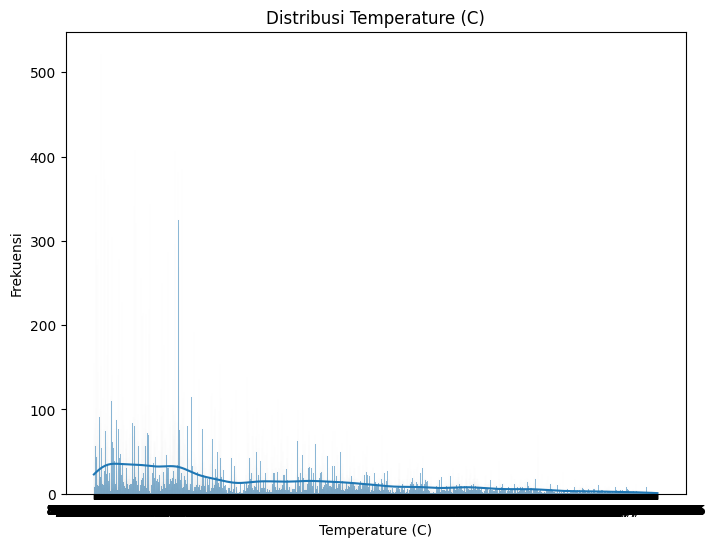

In [ ]:
# Visualisasi distribusi suhu(target)
plt.figure(figsize=(8, 6))
sns.histplot(data['Temperature (C)'], kde=True, bins=30)
plt.title('Distribusi Temperature (C)')
plt.xlabel('Temperature (C)')
plt.ylabel('Frekuensi')
plt.show()

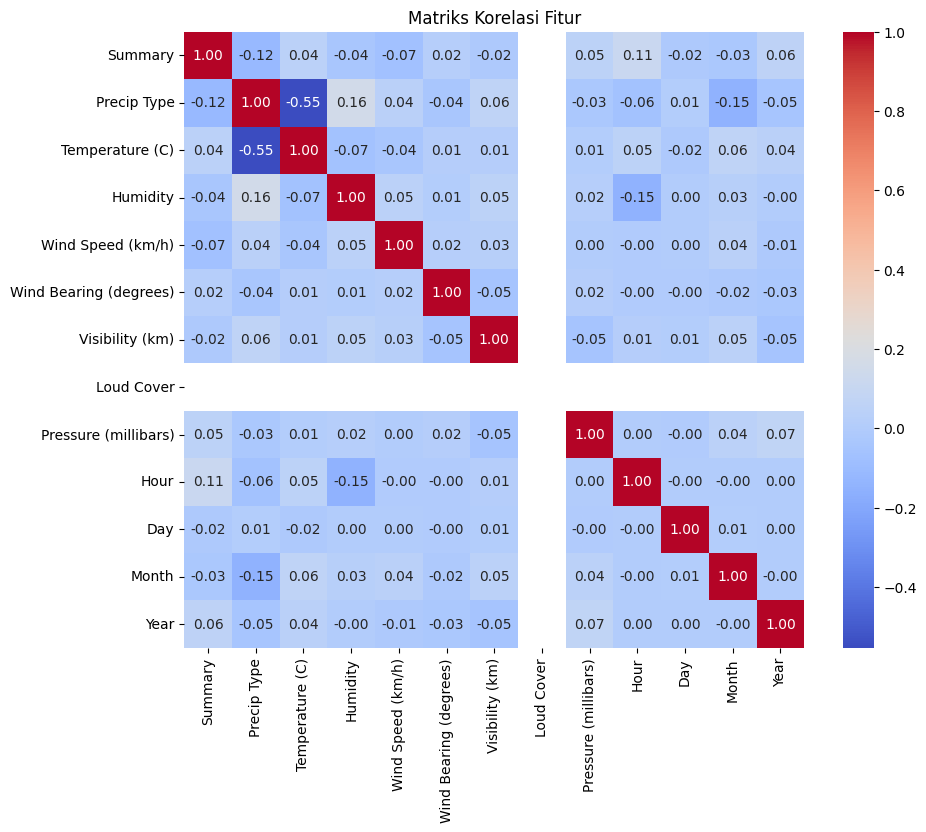

In [ ]:
# Korelasi antar fitur numerik
correlation_matrix = data.corr()

# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Fitur')
plt.show()


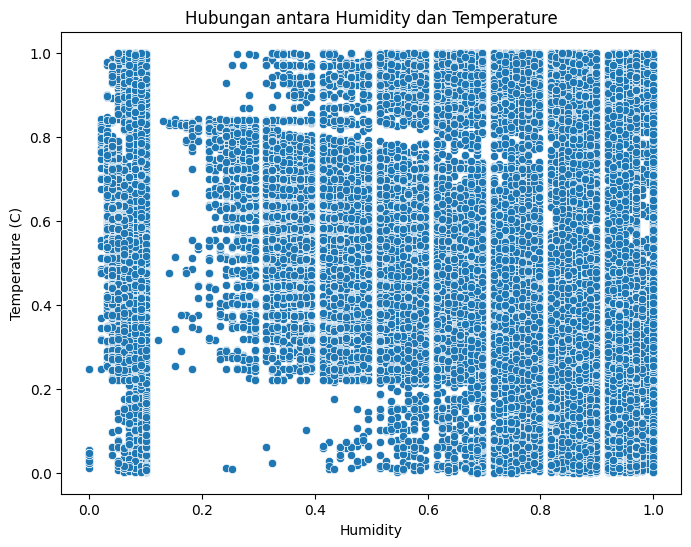

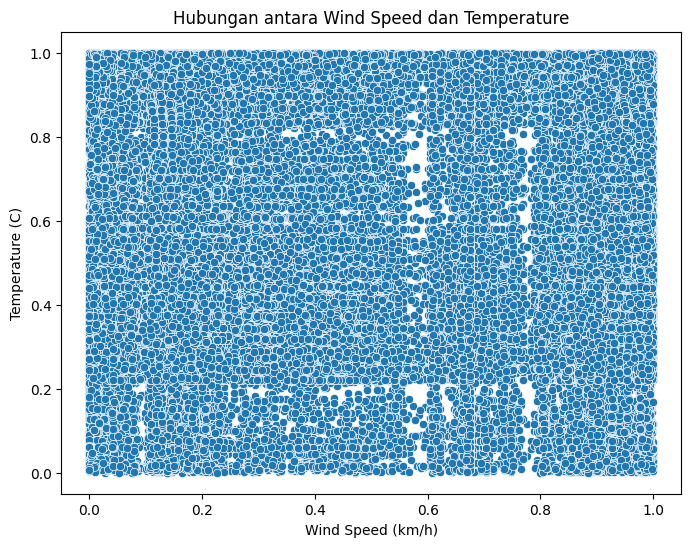

In [ ]:
# Visualisasi hubungan antara suhu dan kelembapan
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Humidity'], y=data['Temperature (C)'])
plt.title('Hubungan antara Humidity dan Temperature')
plt.xlabel('Humidity')
plt.ylabel('Temperature (C)')
plt.show()

# Visualisasi hubungan antara suhu dan kecepatan angin
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Wind Speed (km/h)'], y=data['Temperature (C)'])
plt.title('Hubungan antara Wind Speed dan Temperature')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Temperature (C)')
plt.show()


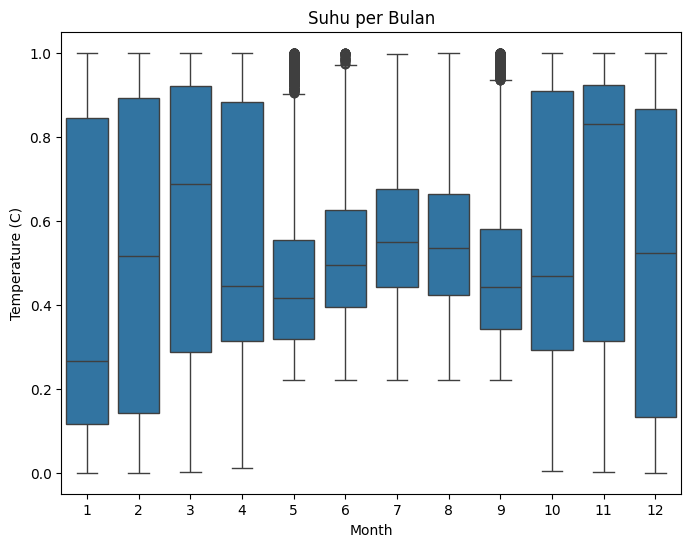

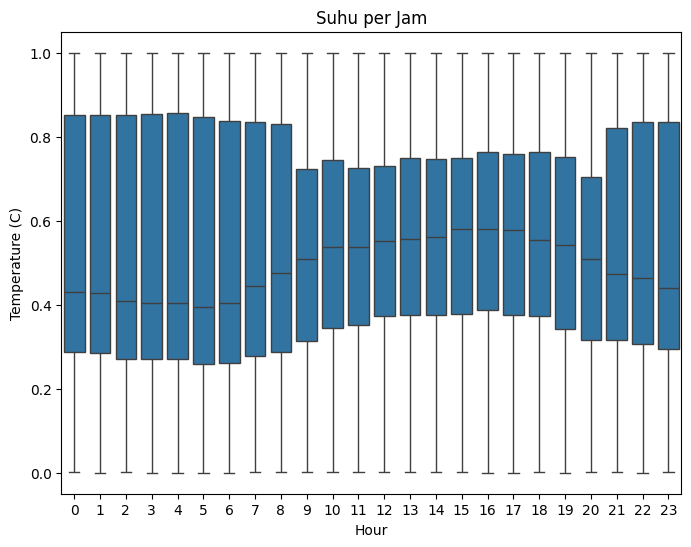

In [ ]:
# Visualisasi suhu per bulan
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Month'], y=data['Temperature (C)'])
plt.title('Suhu per Bulan')
plt.xlabel('Month')
plt.ylabel('Temperature (C)')
plt.show()

# Visualisasi suhu per jam
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Hour'], y=data['Temperature (C)'])
plt.title('Suhu per Jam')
plt.xlabel('Hour')
plt.ylabel('Temperature (C)')
plt.show()

Menyimpan dataset

In [ ]:
# Menyimpan data yang telah diproses ke file CSV baru
data.to_csv('weatherhistorypreprocessed_data.csv', index=False)

# Menampilkan pesan konfirmasi bahwa file telah disimpan
print("Data telah disimpan ke 'preprocessed_data.csv'.")

Data telah disimpan ke 'preprocessed_data.csv'.
